## Курсовой проект "Регрессия." 

### Geekbrains Алгоритмы для анализа данных. Прогнозировать средние результаты экзаменов по математике для студентов репетиторов"



#### Датасет

##### Загрузка библиотек

In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
#def calc_r2_score(true, pred):
#    r2 = 1 - (np.sum((true-pred)**2)/np.sum((true - np.mean(true))**2))
#    return r2


In [120]:
def mse_calc(y, y_pred):
    mse = np.mean((y - y_pred) ** 2)
    return mse

In [121]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = 1 - (np.sum((y_train-y_train_pred)**2)/np.sum((y_train - np.mean(y_train))**2))
    r2_test = 1 - (np.sum((y_test-y_test_pred)**2)/np.sum((y_test - np.mean(y_test))**2))
    print(f'R2 score train: {r2_train}, R2 score test: {r2_test}')

#### Загрузка трейна

In [122]:
train_df = pd.read_csv('/Users/Adm1n/algoritm/data1/train.csv')

In [123]:
train_df.shape

(10000, 12)

In [124]:
train_df.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


##### Загрузка теста

In [125]:
test_df = pd.read_csv('/Users/Adm1n/algoritm/data1/test.csv')

In [126]:
test_df.shape

(10000, 11)

In [127]:
test_df.head(5)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [128]:
train_df.isnull().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

In [129]:
test_df.isnull().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
dtype: int64

#### Пропусков нет

In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [131]:
train_df.drop('Id', axis = 1, inplace = True)
test_df.drop('Id', axis = 1, inplace = True)

In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [133]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB


In [134]:
train_df.describe() ### получим статистические характеристики

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


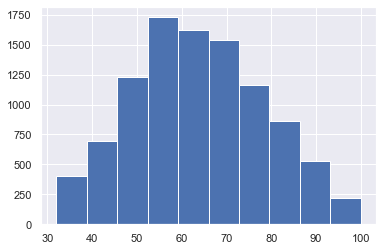

In [135]:
target_name = 'mean_exam_points'
plt.hist(train_df[target_name])
plt.show()

#### Получили нормальное распределение

In [136]:
train_df.columns.tolist()

['age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points']

In [137]:
feature_names = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english',
 'geography', 'history', 'mean_exam_points']
target_name = 'mean_exam_points'

In [138]:
X = train_df[feature_names].values
y = train_df[target_name].values

In [139]:
train_df[target_name].value_counts()

63     312
59     279
61     273
57     266
62     264
      ... 
100     32
33      30
96      28
99      19
98      17
Name: mean_exam_points, Length: 69, dtype: int64

Построим корреляционную матрицу зависимостей и посмотрим корреляцию признаков

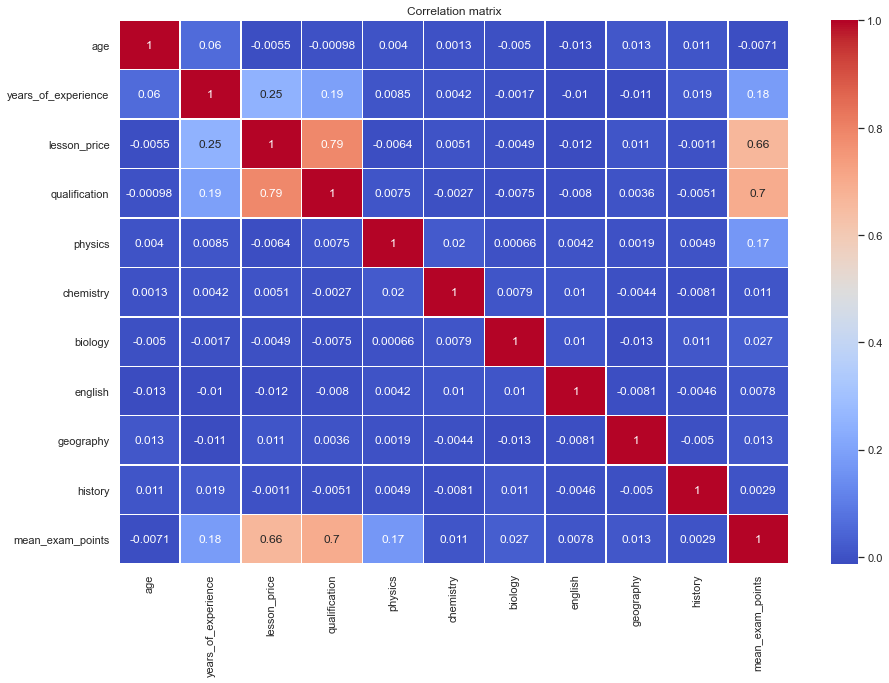

In [140]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1)
sns.heatmap(train_df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

mean_exam_points коррелирует больше всего с lesson_price - стоимость урока и qualification - квалификация преподавателя

Выберем признаки:

In [162]:
final_feature_names = ['years_of_experience', 'lesson_price', 'qualification', 'physics']

In [142]:
final_feature_names

['years_of_experience', 'lesson_price', 'qualification', 'physics']

In [143]:
X = train_df[final_feature_names]
y = train_df[target_name]
test_df = test_df[final_feature_names]

In [144]:
X

,years_of_experience,lesson_price,qualification,physics
0,0.0,1400.0,1.0,1.0
1,4.0,2850.0,3.0,1.0
2,0.0,1200.0,1.0,0.0
3,5.0,1400.0,1.0,0.0
4,1.0,1500.0,1.0,0.0
...,...,...,...,...
9995,0.0,1700.0,2.0,1.0
9996,0.0,1700.0,2.0,0.0
9997,1.0,1250.0,1.0,1.0
9998,3.0,1100.0,1.0,0.0


In [145]:
y

0       61
1       76
2       53
3       54
4       57
        ..
9995    83
9996    58
9997    62
9998    56
9999    52
Name: mean_exam_points, Length: 10000, dtype: int64

In [146]:
test_df

,years_of_experience,lesson_price,qualification,physics
0,3.0,1050.0,1.0,0.0
1,3.0,1850.0,2.0,0.0
2,1.0,1550.0,1.0,1.0
3,6.0,2900.0,3.0,1.0
4,4.0,3150.0,3.0,1.0
...,...,...,...,...
9995,0.0,1500.0,1.0,0.0
9996,2.0,2200.0,3.0,0.0
9997,5.0,1100.0,1.0,0.0
9998,0.0,1750.0,2.0,0.0


In [147]:
# Разобьем выборку на трейн и тест:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle= True, stratify=y, random_state = 1)


In [148]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

### RegressionTree

In [149]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [150]:
class Leaf:
    
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        self.prediction = self.predict()
        
    def predict(self):
        return self.targets.mean()

In [151]:
class RegressionTree:
    
    def __init__(self, max_depth = 50, depth = 0):
        self.max_depth = max_depth
        self.depth = depth
        self.tree=None
        
    def criterion(self, targets):
        # критерии и в задаче регрессии, и в задаче классификации должен стремиться к 0
        return np.mean((targets - targets.mean())**2)
    
    def gain(self, left_targets, right_targets, root):

        # доля выборки, ушедшая в левое поддерево
        p = float(left_targets.shape[0]) / (left_targets.shape[0] + right_targets.shape[0])

        return root - p * self.criterion(left_targets) - (1 - p) * self.criterion(right_targets) 
    
    def get_subsample(self, len_sample):
        # выводим индексы признаков
        sample_indexes = list(range(len_sample))
        
        # В задаче регрессии рекомендовали создавать выборку = кол-во признаков/3
        len_subsample = int(len_sample/3)

        subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

        return subsample
    
    def split(self, data, targets, index, t):
        
        left = np.where(data[:, index] <= t) # t - порог вопроса
        right = np.where(data[:, index] > t)
        
        true_data = data[left]
        false_data = data[right]
        true_targets = targets[left]
        false_targets = targets[right]
        
        return true_data, false_data, true_targets, false_targets
        
    def find_best_split(self, data, targets):
        
        min_samples_leaf = 5
        
        root = self.criterion(targets)
        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]
        subsample = self.get_subsample(n_features)
        
        for index in subsample:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(data[:, index])

            for t in t_values:
                
                true_data, false_data, true_targets, false_targets = self.split(data, targets, index, t)
                
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_samples_leaf or len(false_data) < min_samples_leaf:
                    continue

                current_gain = self.gain(true_targets, false_targets, root)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index
    
    def build_tree(self, data, targets, depth, max_depth):
        
        gain, t, index = self.find_best_split(data, targets)
        
        if gain == 0 or depth > max_depth:
            return Leaf(data, targets)
        
        depth +=1
        
        true_data, false_data, true_targets, false_targets = self.split(data, targets, index, t)
        
        true_branch = self.build_tree(true_data, true_targets, depth, max_depth)
        false_branch = self.build_tree(false_data, false_targets, depth, max_depth)
        
        return Node(index, t, true_branch, false_branch)

    def predict_object(self, obj, node):
         
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer
        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    
    def predict(self, data):
        pred_values = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            pred_values.append(prediction)
        return pred_values
    
    def fit(self, data, targets):
        self.tree = self.build_tree(data, targets,  self.depth, self.max_depth)
        return self

In [152]:
regres_tree = RegressionTree(max_depth=5)
evaluate_model(X_train, y_train, X_test, y_test, regres_tree)

R2 score train: 0.4598253036316726, R2 score test: 0.44879312973320995


### GradBoost

In [153]:
class GradBoost:
    
    def __init__(self, n_trees, max_depth, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.eta = eta
        self.trees = []

    def residual(self, y, z):
        return 2*(y - z)

    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = RegressionTree(max_depth = self.max_depth)

            # первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X, y)

            else:
                # Получим ответы на текущей композиции
                targets = self.predict(X)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X, self.residual(y, targets))
                
            self.trees.append(tree)
        return self.trees

    def predict(self, X):
        predictions = np.array([sum([self.eta * alg.predict([x])[0] for alg in self.trees]) for x in X])
        return predictions

In [154]:
n_trees = 50
max_depth = 5
eta = 0.1


gr_boost = GradBoost(n_trees = n_trees, max_depth = max_depth, eta = eta)

In [155]:
evaluate_model(X_train, y_train, X_test, y_test, gr_boost)

R2 score train: 0.6743837480674116, R2 score test: 0.6480238993712121


#### Показатели лучше при использовании Градиентного бустинга. Используем данную модель для предсказания.

In [156]:
test = test_df.values

In [157]:
test


array([[3.00e+00, 1.05e+03, 1.00e+00, 0.00e+00],
       [3.00e+00, 1.85e+03, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.55e+03, 1.00e+00, 1.00e+00],
       ...,
       [5.00e+00, 1.10e+03, 1.00e+00, 0.00e+00],
       [0.00e+00, 1.75e+03, 2.00e+00, 0.00e+00],
       [5.00e+00, 2.00e+03, 2.00e+00, 1.00e+00]])

In [158]:
predictions = gr_boost.predict(test)

In [159]:
predictions

array([54.25150506, 63.28258258, 48.75812141, ..., 55.00538365,
       64.57563716, 68.68964312])

In [163]:
sample_submission = pd.read_csv('/Users/Adm1n/algoritm/data1/sample_submission.csv')
sample_submission['mean_exam_points'] = predictions
sample_submission[['Id', 'mean_exam_points']].to_csv('/Users/Adm1n/algoritm/data1/sample_submission_deg.csv', index=None)

In [164]:
sample_submission

,Id,mean_exam_points
0,10000,54.251505
1,10001,63.282583
2,10002,48.758121
3,10003,89.560910
4,10004,87.905305
...,...,...
9995,19995,43.892725
9996,19996,78.436749
9997,19997,55.005384
9998,19998,64.575637
